In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [28]:
path = r'/Users/gauravvattikuti/Documents/VSCode/poker_app/data/poker-10427_2024-04-27_export.csv'

In [29]:
cols = ['Game', 'Anudeep', 'Gaurav', 'Mythili', 'Dipak', 'Dinesh', 'Aravind', 'Deepak', 'Viswanth', 'Sumanth', 'Harsha', 'Tejaswani', 'Koustav']

df = pd.read_csv(path, header = 0, names = cols)

df.replace(0, np.nan, inplace = True)

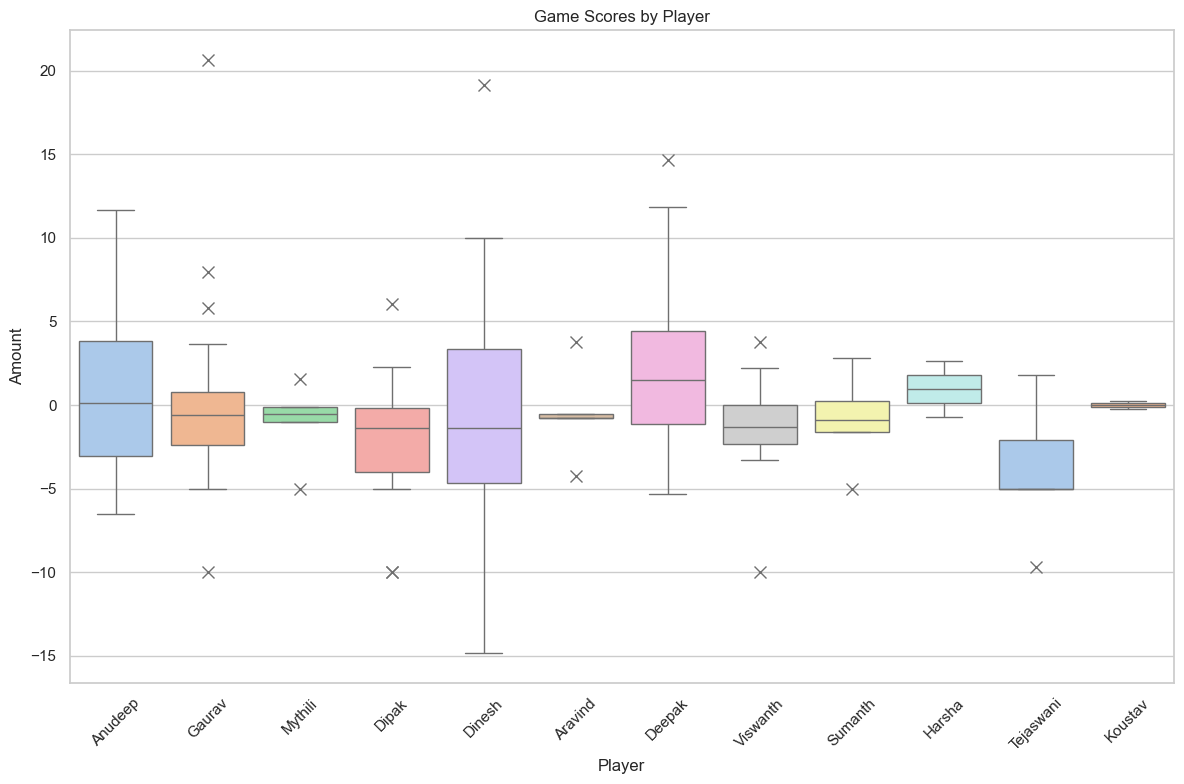

In [87]:
df_long = df.melt(id_vars=['Game'], var_name='Player', value_name='Amount')

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_long, x='Player', y='Amount', hue = 'Player', palette='pastel', flierprops=dict(marker='x', markersize=8), legend = False)

sns.set_style("whitegrid")

plt.xticks(rotation=45)
plt.title('Game Scores by Player')
plt.ylabel('Amount')
plt.xlabel('Player')
plt.tight_layout()
plt.show()

/var/folders/7j/qcm64r196nx85pphcp9979y80000gn/T/ipykernel_35779/3667352124.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(data=df_cleaned.drop(columns='Game'), ci='sd', join=False, markers='^', color='Black')
/var/folders/7j/qcm64r196nx85pphcp9979y80000gn/T/ipykernel_35779/3667352124.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df_cleaned.drop(columns='Game'), ci='sd', join=False, markers='^', color='Black')


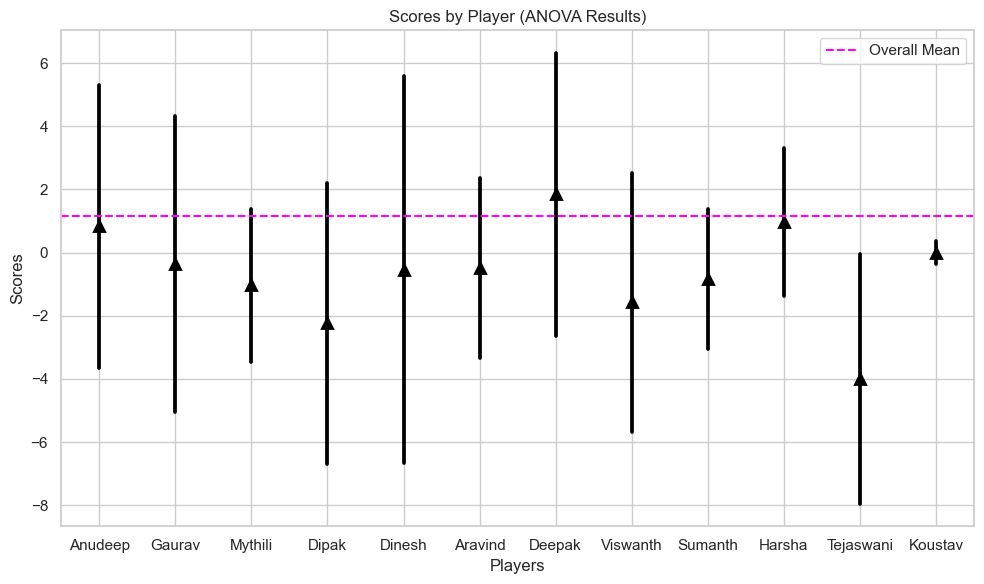

ANOVA F-Statistic: nan
ANOVA p-value: nan


In [106]:
# Drop rows with missing values
df_cleaned = df

# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*[df_cleaned[player] for player in df_cleaned.columns if player != 'Game'])

# Plotting the ANOVA results
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_cleaned.drop(columns='Game'), ci='sd', join=False, markers='^', color='Black')
plt.xlabel('Players')
plt.ylabel('Scores')
plt.title('Scores by Player (ANOVA Results)')
plt.axhline(y=df_cleaned.mean().mean(), color='Magenta', linestyle='--', label='Overall Mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print ANOVA results
print("ANOVA F-Statistic:", f_statistic)
print("ANOVA p-value:", p_value)